# Credit Card Fraud Detection with Python

## Business Problem: 

Credit card fraud is the unauthorized use of a credit or debit card to make purchases. When it comes to credit card fraud, everyone pays the price. Consumers and the businesses that serve them all suffer from fraudulent activity. And the costs can be staggering. Global financial losses related to payment cards are estimated to reach $34.66 billion in 2022. Everyone along the payment lifecycle is impacted by a fraudulent transaction—from the consumer who makes purchases in person or online using a credit or debit card to the merchant who finalizes that purchase.

Credit card companies have an obligation to protect their customers’ finances and they employ fraud detection models to identify unusual financial activity and freeze a user’s credit card if transaction activity is out of the ordinary for a given individual. The penalty for mislabeling a fraud transaction as legitimate is having a user’s money stolen, which the credit card company typically reimburses. On the other hand, the penalty for mislabeling a legitimate transaction as fraud is having the user frozen out of their finances and unable to make payments. There is a very fine tradeoff between these two consequences and we will discuss how to handle this when training a model.

![credit card fraud](fraud.jpg)

## Project Tasks:
-  Perform an exploratory data analysis to the training data to understand which features might be correlated to fraudulent activities.
-   Create models with those features and test out their predicitve effectiveness. 


## The Dataset:
The dataset is from Kaggle.
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. 
(Thanks to Brandon Harris for his amazing work in creating this easy-to-use simulation tool for creating fraud transaction datasets.)
There are 23 columns and 1,296,675 rows. 
- "Unnamed:0" id of the record
- trans_date_trans_time
- cc_num: 
- merchant: merchat name
- category: transaction category
- amt: transaction amount
- first: first name
- last: last name
- gender: "F" , "M"
- street: street address
- city
- state
- zip: zip code
- lat: latitudinal
- long: longitudinal
- city_pop: city population
- job: career
- trans_num: transaction number
- unix_time: unix format time stamp
- merch_lat: latitudinal of merchant
- merch_long: longitudinal of merchant
- is_fraud: fraudulent transactions as 1 and non-fraudulent as 0

![Map](map.jpg)

In [49]:
pip install plotly

  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression # For Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier # For Desicion Tree Classification Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classification Model
from sklearn.model_selection import GridSearchCV # For hyperparameters tuning
from sklearn.preprocessing import LabelEncoder # For converted categorical variables to numerical variables
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
import plotly.express as px

## Data Validation

In [51]:
fraud = pd.read_csv('fraud.csv')
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [52]:
fraud.info()
# no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [53]:
fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [54]:
fraud.shape

(1296675, 23)

## Exploratory Data Analysis & Feature Engineering


### Target Variable: is_fraud

0.005788651743883394

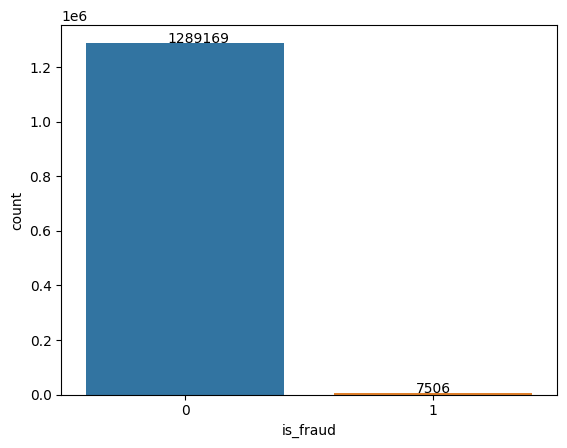

In [55]:
# Target Variable - is_fraud
ax = sns.countplot(x = 'is_fraud', data = fraud)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+160))
fraud.is_fraud.mean()
# The fraud rate is 0.58%. It is an imbalanced dataset.

In [56]:
labels=["Genuine","Fraud"]

fraud_or_not = fraud["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=fraud['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","purple"]
             ,title="Fraud vs Genuine Transactions")
fig.show()

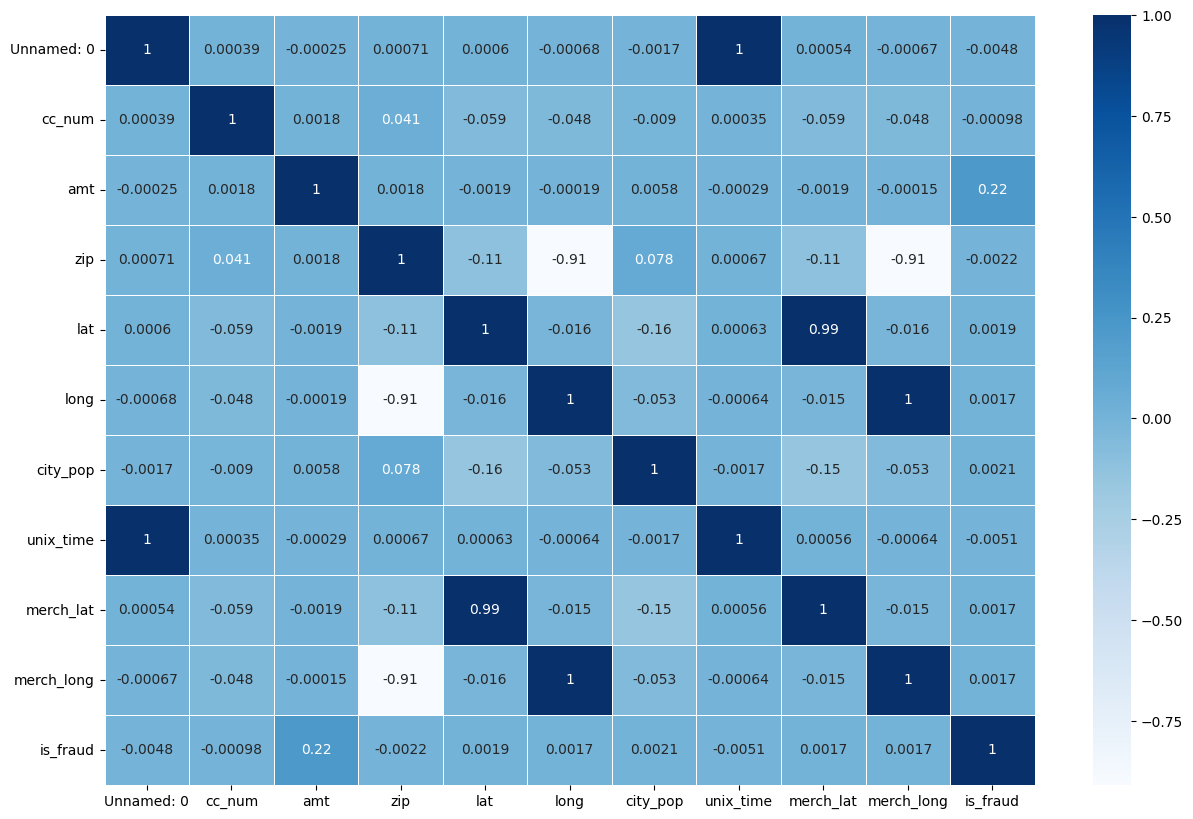

In [57]:
#Plotting the heat map to find the correlation between the columns
plt.figure(figsize=(15,10))
sns.heatmap(fraud.corr(),annot=True, linewidths=0.5, cmap = "Blues")
plt.show()

### Categorical Variables: merchant, cetegory, gender, city, state,job, trans_week_day,trans_hour

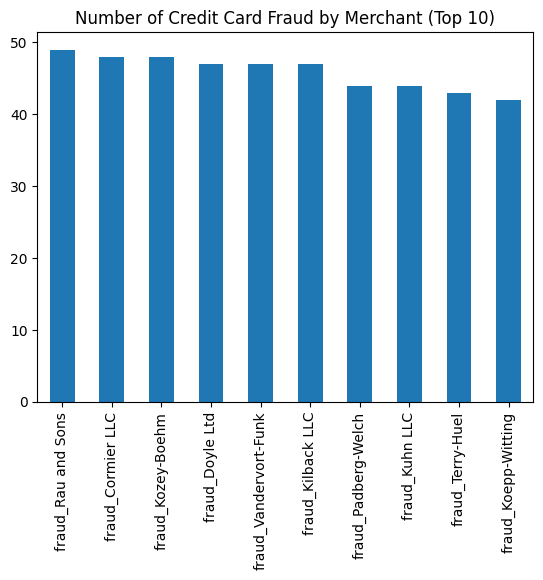

fraud_Rau and Sons        49
fraud_Cormier LLC         48
fraud_Kozey-Boehm         48
fraud_Doyle Ltd           47
fraud_Vandervort-Funk     47
                          ..
fraud_Kuphal-Toy           1
fraud_Eichmann-Kilback     1
fraud_Lynch-Mohr           1
fraud_Tillman LLC          1
fraud_Hills-Olson          1
Name: merchant, Length: 679, dtype: int64

In [58]:
# merchant
fraud[fraud.is_fraud == 1].merchant.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Fraud by Merchant (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].merchant.value_counts()
# Insight: merchant could be a predictor, fraud_Rau and Sons, Fraud Cormier LLC have fraud_Kozey-Boehm.. have higher fraud activities. 

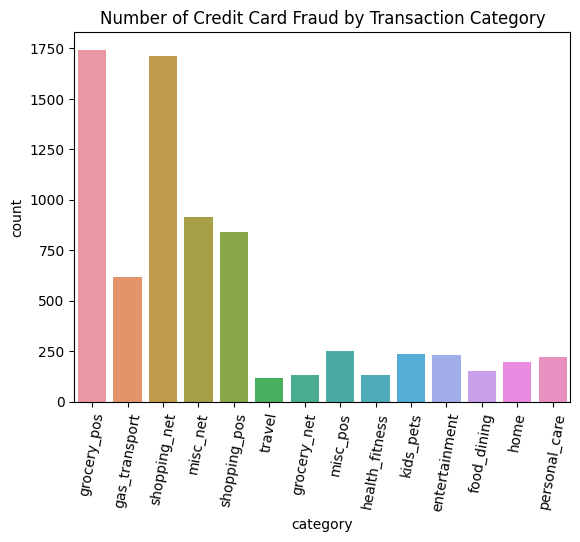

In [59]:
# category:
sns.countplot(x= 'category',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Fraud by Transaction Category")
plt.xticks(rotation=80)
plt.show()

# Insight: category could be a good predictor. shoping_net and grocery_pos seem to have relative higher fraud acitivites.

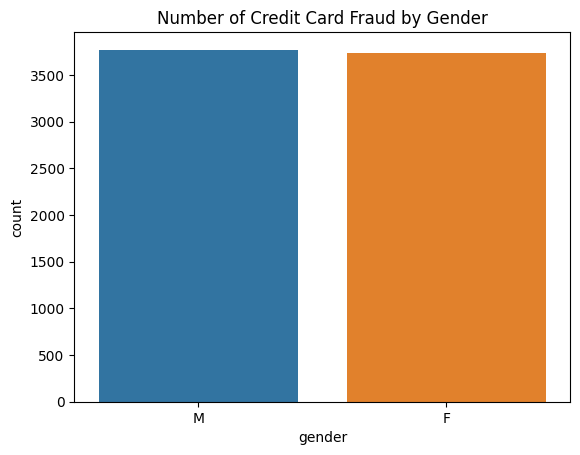

In [60]:
# Gender
sns.countplot(x= 'gender',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Fraud by Gender")
plt.show()
# Insight: hard to tell the difference from gender

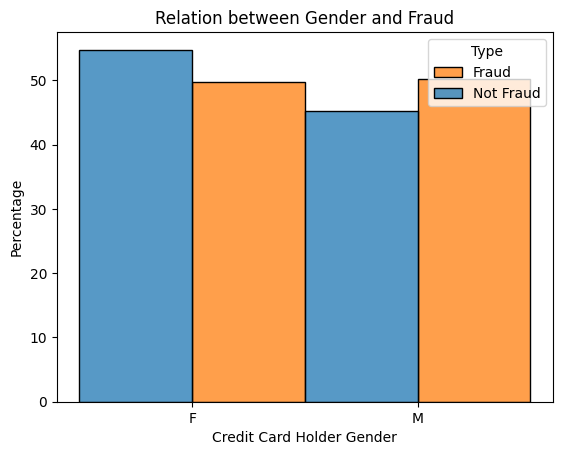

In [61]:
#Relation between Gender and Fraud
ax=sns.histplot(x='gender',data=fraud, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.title("Relation between Gender and Fraud")
plt.show()

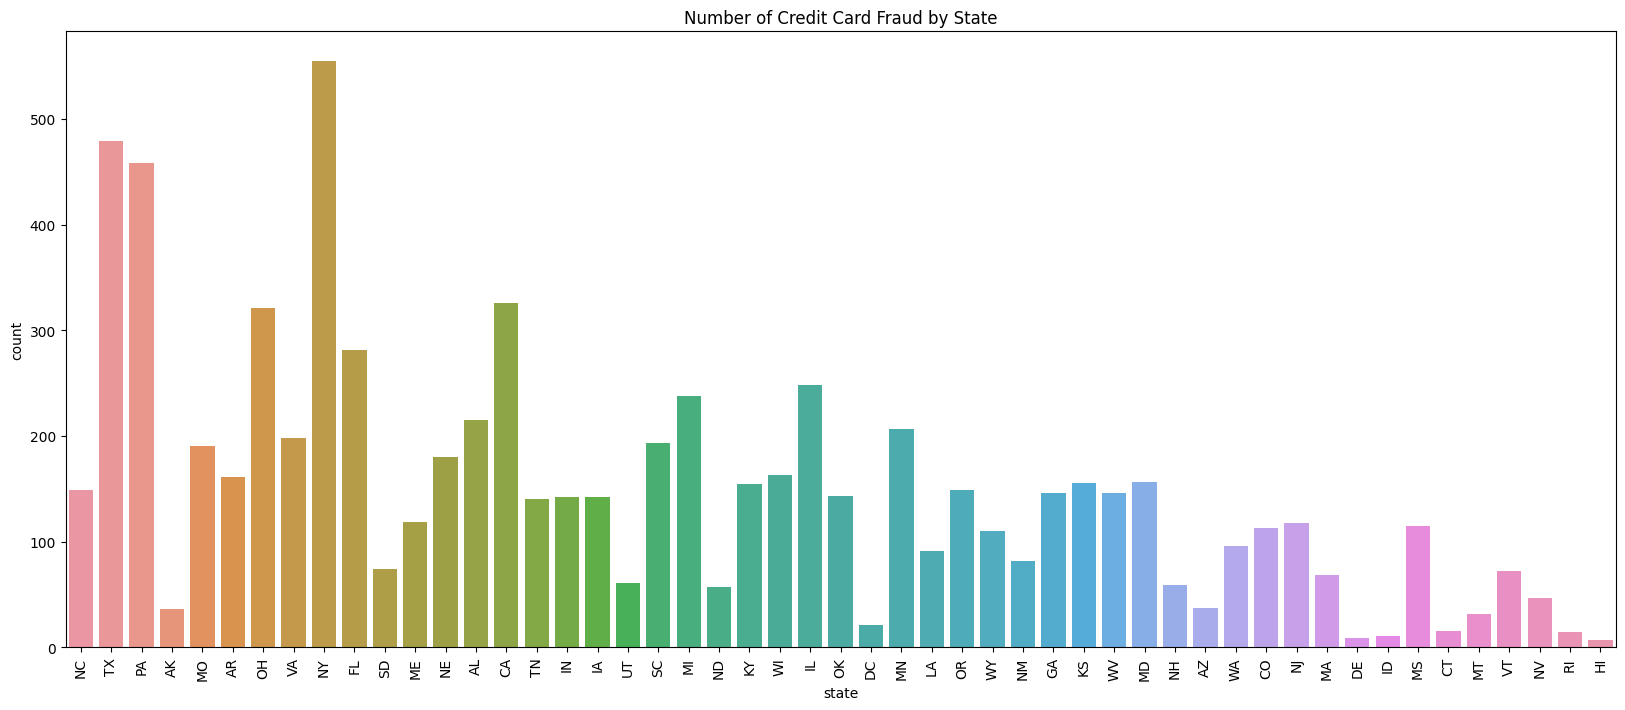

In [62]:
# State
plt.figure(figsize=(20,8))
sns.countplot(x= 'state',data = fraud[fraud.is_fraud == 1])
plt.xticks(rotation=90)
plt.title("Number of Credit Card Fraud by State")
plt.show()
# Insight: state could be a good predictor. States NY, TX,PA report the most number of fraud.

In [63]:
#plot a geographical map of United States with different color schemes showing the intensity of fraud transactions that happened
import plotly.express as px
df = fraud.groupby('state').sum()['is_fraud'].to_frame()
df.reset_index(inplace =True)
df = df.rename(columns= {'state':'State', 'is_fraud':'Fraud Transactions'})
fig = px.choropleth(df,
                    locations='State',
                    color='Fraud Transactions',
                    locationmode='USA-states',
                    color_continuous_scale="Pinkyl",
                    labels={'States':'Fraud Transactions'},
                    scope='usa')
fig.add_scattergeo(
    locations=df['State'],
    locationmode='USA-states',
    text=df['State'],
    mode='text'
)
fig.show()

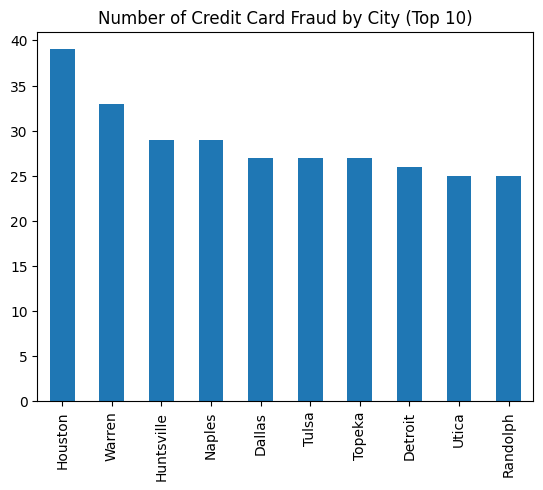

Houston           39
Warren            33
Huntsville        29
Naples            29
Dallas            27
                  ..
Florence           3
Kilgore            2
Phoenix            2
Phenix City        2
Denham Springs     2
Name: city, Length: 702, dtype: int64

In [64]:
# City:
fraud[fraud.is_fraud == 1].city.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Fraud by City (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].city.value_counts()
# Insight:city could be a good predictor. Cities Houston, Warren, Huntsville report the most number of fraud.

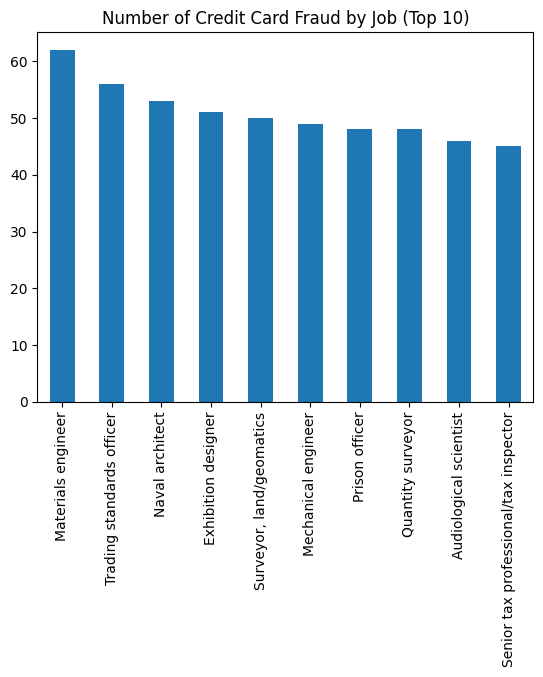

Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: job, Length: 443, dtype: int64

In [65]:
# Job
fraud[fraud.is_fraud == 1].job.value_counts(sort =True, ascending = False).head(10).plot(kind = 'bar')
plt.title("Number of Credit Card Fraud by Job (Top 10)")
plt.show()
fraud[fraud.is_fraud == 1].job.value_counts()
# Insight: Job could be a good predictor. Materials engineer, Trading starndards officer, Navel architect report the most number of fraud.

In [66]:
# Generate some new Categorical Variables:
# convert trans_data_trans_time from str to datatime format
fraud['trans_date'] = pd.to_datetime(fraud['trans_date_trans_time'], format = "%Y-%m-%d %H:%M:%S")

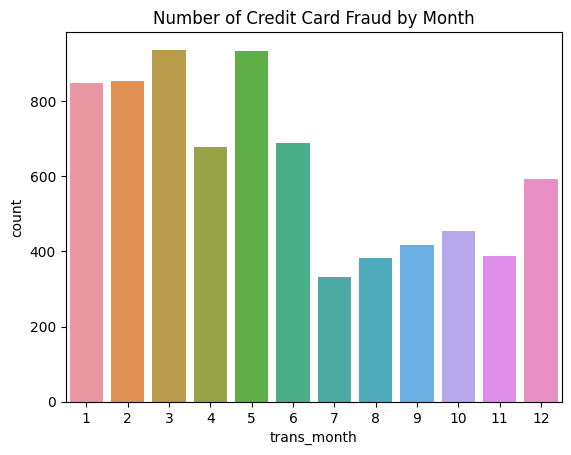

In [67]:
# extract the transaction month of the year
fraud['trans_month'] = fraud['trans_date'].dt.month
sns.countplot(x= 'trans_month',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Fraud by Month")
plt.show()
# Insight: trans_month could be a predictor.

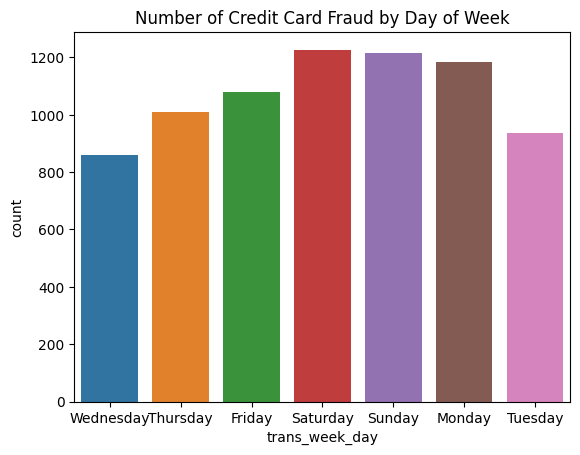

In [68]:
# extract the transaction day of week
fraud['trans_week_day'] = fraud['trans_date'].dt.day_name()
sns.countplot(x= 'trans_week_day',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Fraud by Day of Week")
plt.show()

#Insight: trans_week_day could be a good predictor, Saturday, Sunday,Monday report the most number of fraud.

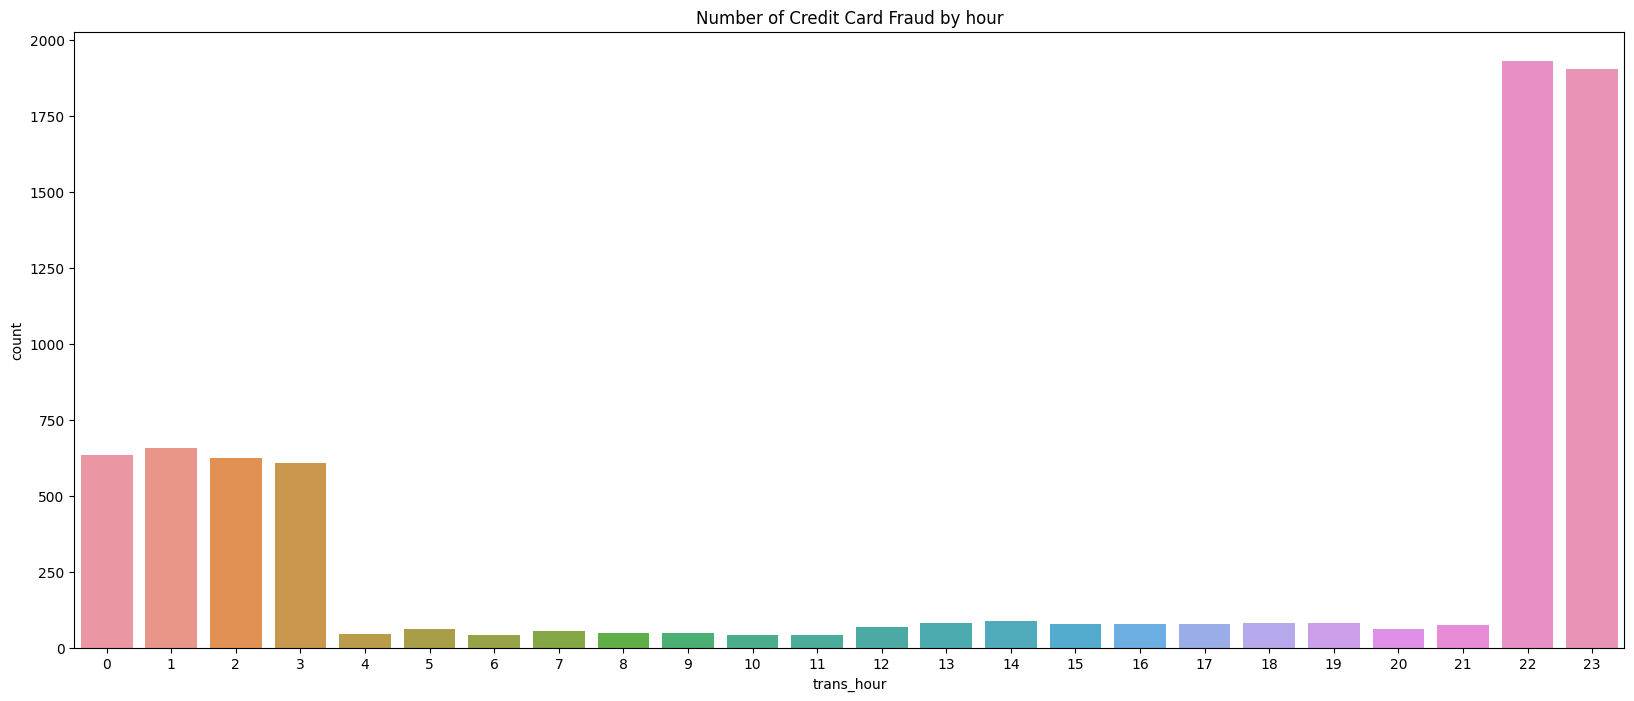

In [69]:
# extract the transaction hour of day
fraud['trans_hour']=fraud['trans_date'].dt.hour
plt.figure(figsize=(20,8))
sns.countplot(x= 'trans_hour',data = fraud[fraud.is_fraud == 1])
plt.title("Number of Credit Card Fraud by hour")
plt.show()
#Insight: trans_hour could be a good predictor, Hours of 22, 23, 0, 1, 2, 3 report the most number of fraud.

### Numerical Variables: amt, lat, long, dob, merch_lat, merch_long


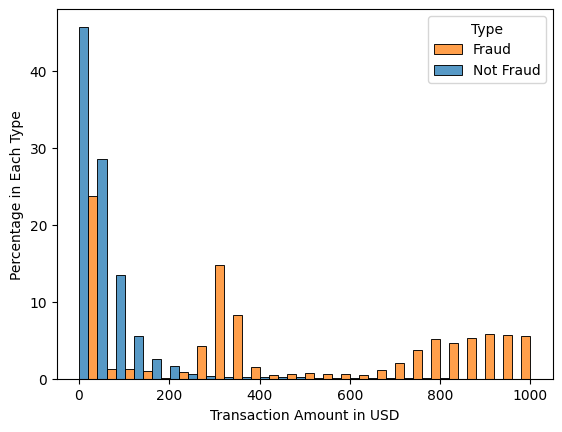

In [70]:
#amount vs fraud
ax=sns.histplot(x='amt',data=fraud[fraud.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()
# Insight: amount could be a good predictor

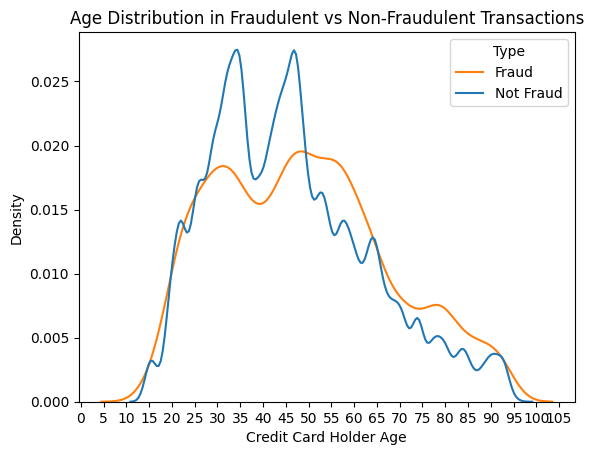

In [71]:
#age
fraud['age']=fraud['trans_date'].dt.year-pd.to_datetime(fraud['dob']).dt.year
ax=sns.kdeplot(x='age',data=fraud, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()


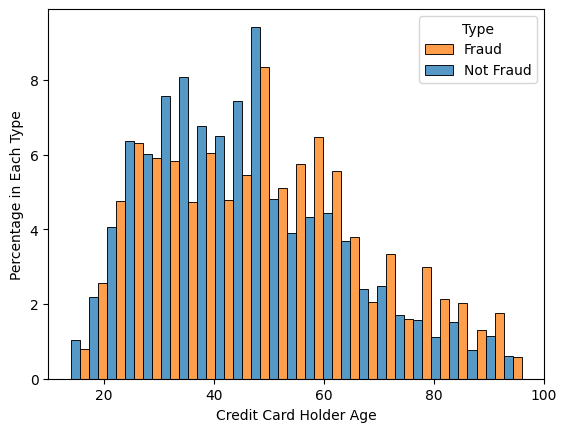

In [72]:
ax=sns.histplot(x='age',data=fraud,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Credit Card Holder Age')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()
# Insight: Age could be a predictor.

In [73]:
pip install h3

  Using cached h3-3.7.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [74]:
# calculate distanc by using lat, long, merch_lat, merch_long
# need Latitude and Longitude to calculate the distance between two locations with following formula: =acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371 
import h3
fraud['distance']= fraud.apply(lambda row: h3.point_dist((row['lat'],row['long']),(row['merch_lat'],row['merch_long'])),axis=1)

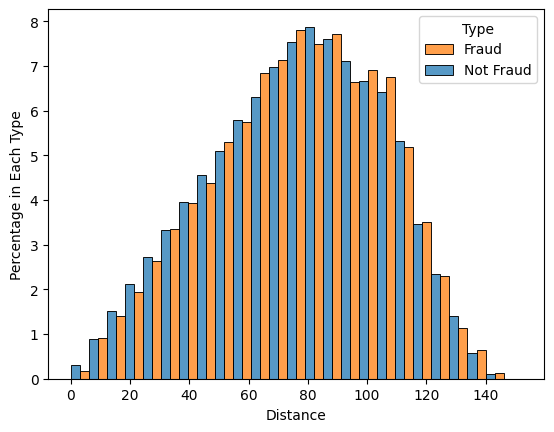

In [75]:
ax=sns.histplot(x='distance',data=fraud,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Distance')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()
# Insight: distance could be a predictor.


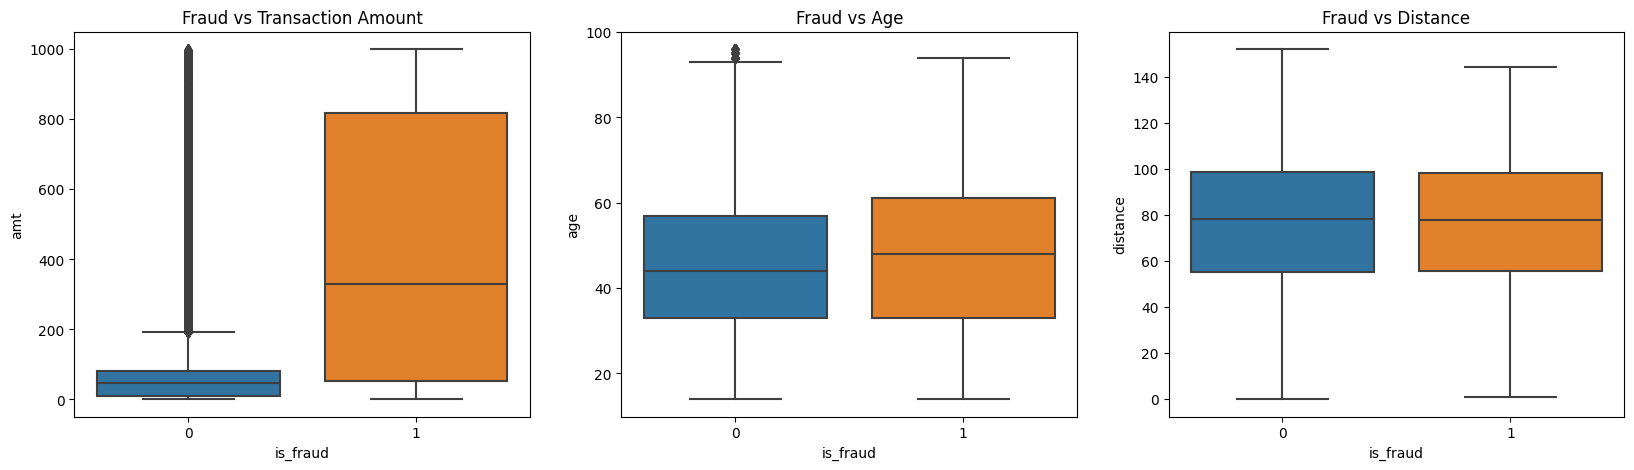

In [76]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(x =fraud.is_fraud,y=fraud[fraud.amt<=1000].amt, ax=axes[0]).set(title='Fraud vs Transaction Amount')
sns.boxplot(x =fraud.is_fraud,y=fraud.age,  ax=axes[1]).set(title='Fraud vs Age')
sns.boxplot(x =fraud.is_fraud,y=fraud.distance, ax=axes[2]).set(title='Fraud vs Distance')
plt.show()

### Preprocessing Data

In [77]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  object        
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [78]:
#prepare data for modeling

# convert categorixal vaiable to numerical format
labelencoder = LabelEncoder()
fraud['merchant']=labelencoder.fit_transform(fraud['merchant'])
fraud['category']=labelencoder.fit_transform(fraud['category'])
fraud['gender']=labelencoder.fit_transform(fraud['gender'])
fraud['city']=labelencoder.fit_transform(fraud['city'])
fraud['state']=labelencoder.fit_transform(fraud['state'])
fraud['job']=labelencoder.fit_transform(fraud['job'])
fraud['trans_week_day']=labelencoder.fit_transform(fraud['trans_week_day'])


In [79]:
feature_cols = ['merchant','category', 'gender','city', 'state', 'job','trans_month','trans_week_day','trans_hour','age','distance','amt']
X = fraud[feature_cols] # Features
y = fraud['is_fraud'] # Target variable

# define the scaler 
scaler = MinMaxScaler()
# fit and transform the train set
X[['age', 'distance','amt']] = scaler.fit_transform(X[['age', 'distance','amt']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 ## Model Fitting & Hyperparameters Tuning & Evaluation

### Decision Tree

In [80]:
# Create Decision Tree classifer object
dtm = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
dtm = dtm.fit(X_train,y_train)

Best max_depth is: 8 
roc_auc_score is: 0.9843941728418165


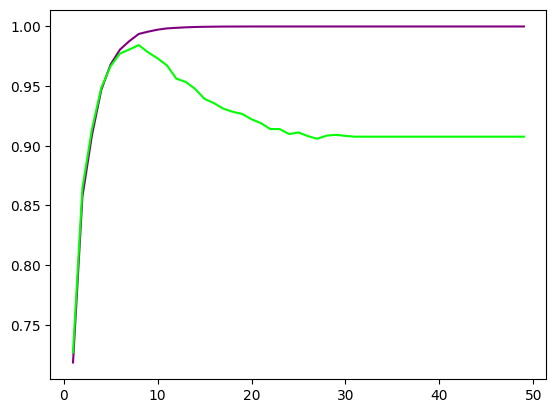

In [81]:
# Hyperparameters tuning for Dasicion Tree model
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1,50):
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict_proba(X_train)[:,1]
    y_pred_t = tree.predict_proba(X_test)[:,1]
    train_score.append(metrics.roc_auc_score(y_train,y_pred))
    test_score.append(metrics.roc_auc_score(y_test, y_pred_t))
    test_pair = (i,metrics.roc_auc_score(y_test,y_pred_t))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()

ax.plot(np.arange(1,50), train_score, label = "roc_auc_score",color='purple')
ax.plot(np.arange(1,50), test_score, label = "roc_auc_score",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nroc_auc_score is: {max_pair[1]}')

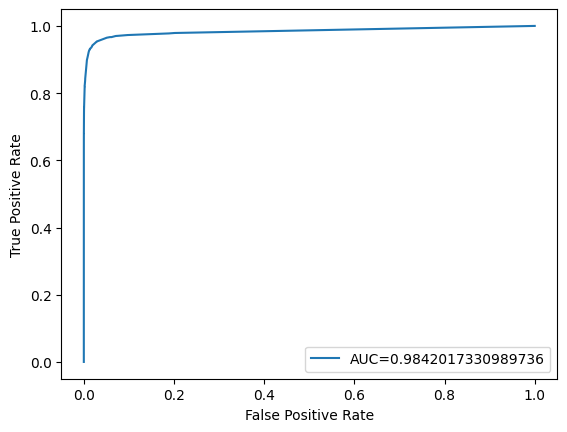

Best Threshold: 0.0064 with G-Mean: 0.9625
FPR: 0.0286, TPR: 0.9536


In [82]:
#define metrics
y_pred_proba = dtm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr)) # using G-mean

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


In [83]:
#Predict the response for test dataset
# select the right threshold to make sure the recall of "1" category is higher
threshold = 0.0286
y_pred = (dtm.predict_proba(X_test)[:, 1] > threshold).astype('float')

dtm_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtm_matrix)
dtm_report = metrics.classification_report(y_test,y_pred)
print(dtm_report)

[[382256   4462]
 [   169   2116]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386718
           1       0.32      0.93      0.48      2285

    accuracy                           0.99    389003
   macro avg       0.66      0.96      0.74    389003
weighted avg       1.00      0.99      0.99    389003



In [97]:
#Predict the response for test dataset
# select the right threshold to make sure the F1-score is higher
threshold = 0.25
y_pred = (dtm.predict_proba(X_test)[:, 1] > threshold).astype('float')

np.set_printoptions(precision=1) 
dtm_matrix = metrics.confusion_matrix(y_test, y_pred)
print(dtm_matrix)
dtm_report = metrics.classification_report(y_test,y_pred,digits=4)
print(dtm_report)


[[386510    208]
 [   556   1729]]
              precision    recall  f1-score   support

           0     0.9986    0.9995    0.9990    386718
           1     0.8926    0.7567    0.8190      2285

    accuracy                         0.9980    389003
   macro avg     0.9456    0.8781    0.9090    389003
weighted avg     0.9979    0.9980    0.9980    389003



Text(0.5, 1.0, 'Feature Importance in Decision Tree Model')

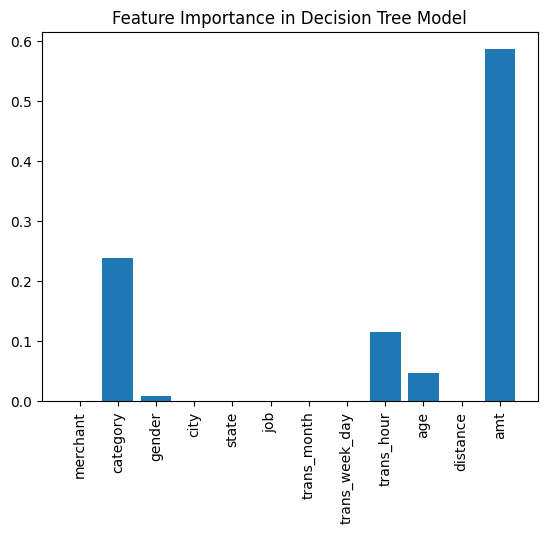

In [85]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = dtm.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Model')

# amt, category,trans_hour, age,gender

### Random Forest

In [47]:
rf = RandomForestClassifier(random_state = 42, n_estimators=1000, bootstrap = True, max_depth=10,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000,
                       random_state=42)

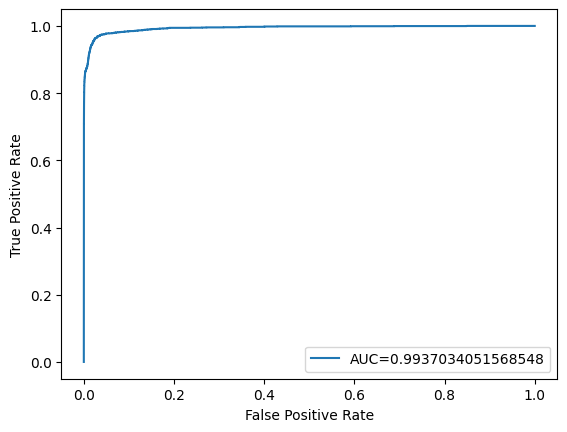

Best Threshold: 0.0118 with G-Mean: 0.9692
FPR: 0.0305, TPR: 0.9689


In [ ]:
#define metrics

y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr)) # using G-mean

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


### Hyperparameters Tuning for Random Forest Model


In [43]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'n_estimators': [200, 500, 1000]
}
# Create a based model
rf_t = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_t, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'roc_auc')

In [ ]:
# Fit the grid search to the data.  
grid_search.fit(X_train, y_train)
grid_search.best_params_
# could take a long time (>100mins)

In [90]:
y_pred2 = rf.predict(X_test)
rf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(rf_matrix)

rf_report = metrics.classification_report(y_test,y_pred2)
print(rf_report)

[[386694     24]
 [   893   1392]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.98      0.61      0.75      2285

    accuracy                           1.00    389003
   macro avg       0.99      0.80      0.88    389003
weighted avg       1.00      1.00      1.00    389003



In [98]:
#Predict the response for test dataset
# select the right threshold to make sure the F1-score is higher
threshold = 0.25
y_pred2 = (rf.predict_proba(X_test)[:, 1] > threshold).astype('float')

rf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(rf_matrix)
rf_report = metrics.classification_report(y_test,y_pred2,digits=4)
print(rf_report)

[[386502    216]
 [   492   1793]]
              precision    recall  f1-score   support

           0     0.9987    0.9994    0.9991    386718
           1     0.8925    0.7847    0.8351      2285

    accuracy                         0.9982    389003
   macro avg     0.9456    0.8921    0.9171    389003
weighted avg     0.9981    0.9982    0.9981    389003



Text(0.5, 1.0, 'Feature Importance in Random Forest Model')

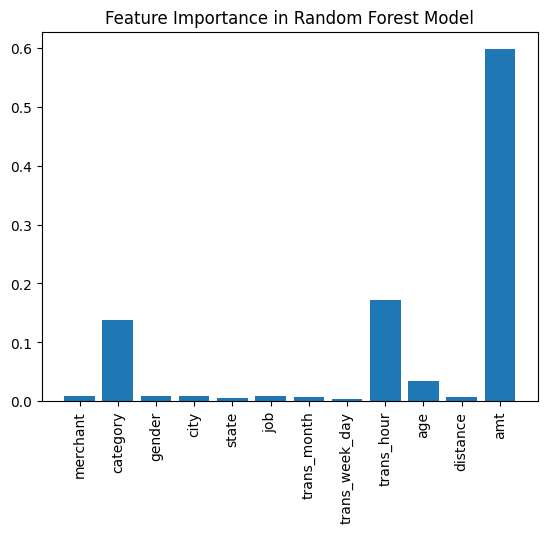

In [94]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = rf.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Random Forest Model')

# amt, trans_hour, category, age....

## Model Comparison

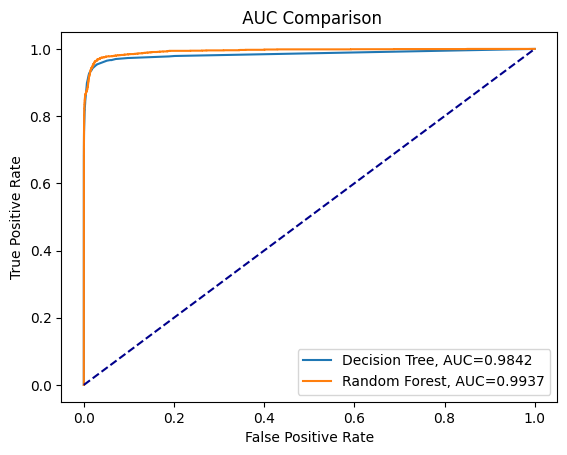

In [95]:
#set up plotting area
plt.figure(0).clf()
#fit decisiom tree model and plot ROC curve
y_pred = dtm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit random forest model and plot ROC curve

y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title(" AUC Comparison")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#add legend
plt.legend()

### Model Comparison

| Metric/Model |Decision Tree | Random Forest  |
| ------ | ------------ | -------------- |
|Accuracy|0.9980 | 0.9987|
|Precision |0.8926 |0.8925 |
|Recall | 0.7567 | 0.7847|
|F1-Score| 0.8190 | 0.8351|
|AUC|0.9842|0.9937|
**We will choose the Random Forest Model.**

## Dealing with Imbalanced Dataset 

Imbalanced data refers to a situation, primarily in classification machine learning, where one target class represents a significant proportion of observations. Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.
There are several approaches to solving class imbalance problem before starting classification, such as:

- Random Oversampling the minority class
- Randm Undersamling the majority class
- SMOTE (Synthetic Minority Oversampling Technique)
- Undersampling using Tomek Links
- Combining SMOTE and Tomek Links
- Class Weights in the models


### Random Resampling Imbalanced Datasets

#### Random Oversampling Imbalanced Datasets

In [99]:
kf =3
#  Random Oversampling Imbalanced Datasets
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [100]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
rf.fit(X_over, y_over)

In [ ]:
threshold = 0.25
y_pred2 = (rf.predict_proba(X_test)[:, 1] > threshold).astype('float')

rf_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(rf_matrix)
rf_report = metrics.classification_report(y_test,y_pred2,digits=4)
print(rf_report)

#### Random Undersampling imbalanced Datasets

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

#### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
smote_rf.fit(X_train, y_train)
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

In [ ]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)


In [ ]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

#### Undersampling using Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

#### Combining SMOTE and Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train)

In [ ]:
y_pred = SMOTETomek_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

#### Class Weights in the models

Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.

Without weights set, the model treats each point as equally important. Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal.

In [ ]:
# If you choose class_weight = "balanced", 
# the classes will be weighted inversely proportional to how frequently they appear in the data.

rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [ ]:
score5 = cross_val_score(rfb, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

In [ ]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)
y_pred = grid_rfb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_rfb_Recall = recall_score(y_test, y_pred)
grid_rfb_Precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

In [ ]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

#### Performance Comparison

In [ ]:
predictions = pd.concat([rf_score, over_rf_score, smote_rf_score, SMOTETomek_rf_score, grid_rfb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)

# Conclusion


There is much more to do when it comes to K-Fold Cross Validation and tuning hyperparameters.

###References:
1. https://www.ncr.com/blogs/payments/credit-card-fraud-detection
2. https://www.kaggle.com/datasets/kartik2112/fraud-detection
3. https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset
